* put csv file in musql with help of python

In [60]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mysql-connector-python in c:\users\shabnam\appdata\local\programs\python\python312\lib\site-packages (9.0.0)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\shabnam\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
     ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='shabnam*03',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/shabnam/OneDrive/Documents/data analyst/ecommerce_project/ecommerce_dataset'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

* Basic Queries
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.


In [2]:
db=mysql.connector.connect(
    host="localhost",
    user="root",
    password="shabnam*03",
    database="ecommerce")
cur=db.cursor()

In [1]:
import pandas as pd
import mysql.connector

C:\Users\shabnam\AppData\Local\Temp\ipykernel_7164\3231519513.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# BASIC QUESTIONS

* List all unique cities where customers are located.

In [6]:
query=""" select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()

In [7]:
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

* Count the number of orders placed in 2017.

In [8]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()

In [10]:
data[0][0]

45101

* Find the total sales per category.

In [19]:
query="""select upper(p.product_category) as category,
round(sum(o.price+o.freight_value),2) as total_sale
from products as p
join 
order_items as o
on p.product_id=o.product_id
group by category"""
cur.execute(query)
data=cur.fetchall()

In [21]:
df=pd.DataFrame(data,columns=["products_category","total_sales"])

In [22]:
df

,products_category,total_sales
0,HEALTH BEAUTY,1441248.07
1,SPORT LEISURE,1156656.48
2,COOL STUFF,719329.95
3,COMPUTER ACCESSORIES,1059272.40
4,WATCHES PRESENT,1305541.61
...,...,...
69,FLOWERS,1598.91
70,KITCHEN PORTABLE AND FOOD COACH,4278.29
71,HOUSE COMFORT 2,1170.58
72,CITTE AND UPHACK FURNITURE,5998.54


* Calculate the percentage of orders that were paid in installments.

In [24]:
query="""select(sum(case when payment_installments >=1 then 1
else 0 end ) )/count(*)*100 from payments;"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

* Count the number of customers from each state.

In [25]:
query="""select customer_state,count(customer_id) as total_customers from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()

In [33]:
df=pd.DataFrame(data,columns=["state","counts"])
df=df.sort_values(by= "counts",ascending=False)

In [34]:
df

,state,counts
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


In [3]:
import matplotlib.pyplot as plt 

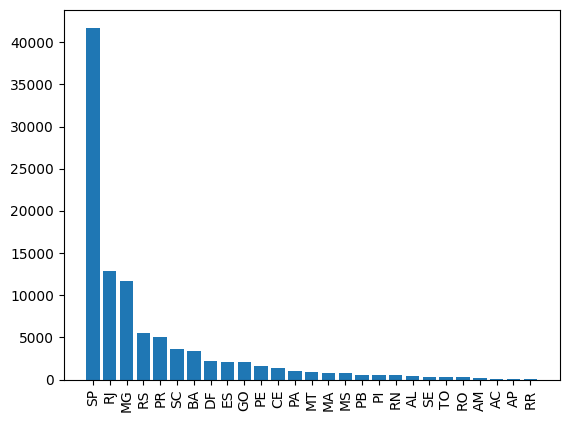

In [35]:
plt.bar(df['state'],df['counts'])
plt.xticks(rotation=90)
plt.show()

# INTERMEDIATE QUESTIONS

* Calculate the number of orders per month in 2018.

In [21]:
query="""select monthname(order_purchase_timestamp)  month ,count(order_id) total_count
from orders where year(order_purchase_timestamp)=2018
group by month"""
cur.execute(query)
data=cur.fetchall()

In [22]:
df=pd.DataFrame(data,columns=["month","val_count"])
o=["january","february","april","may","june","july","august","september","october"]

In [23]:
df

,month,val_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

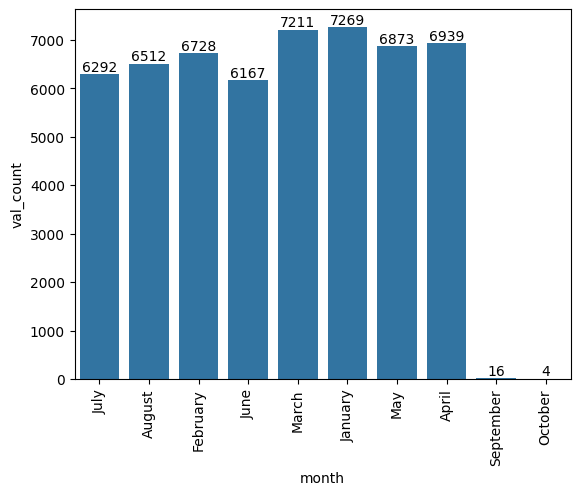

In [34]:
ax=sns.barplot(x=df["month"],y=df["val_count"],data=df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

* Find the average number of products per order, grouped by customer city.

In [39]:
query="""select customers.customer_city,round(count(order_items.order_id)/count(distinct order_items.order_id),2) as average
 from order_items 
 join orders 
 on order_items.order_id=orders.order_id
 join customers 
 on orders.customer_id=customers.customer_id
 group by customers.customer_city order by  average desc """
cur.execute(query)
data=cur.fetchall()

In [41]:
df=pd.DataFrame(data,columns=["cities","avg_sale"])

In [42]:
df.head()

,cities,avg_sale
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00


* Calculate the percentage of total revenue contributed by each product category.

In [5]:
query="""select upper(p.product_category) as category,
round((sum(o.price+o.freight_value)/(select sum(price+freight_value) from order_items) )*100,2)
 total_sale
from products as p
join 
order_items as o
on p.product_id=o.product_id
group by category
order by total_sale desc """
cur.execute(query)
data=cur.fetchall()

In [9]:
df=pd.DataFrame(data,columns=["product_category","total_sales"])

In [10]:
df.head(2)

,product_category,total_sales
0,HEALTH BEAUTY,9.10
1,WATCHES PRESENT,8.24


* Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
query="""select products.product_category as product_category,count(order_items.product_id) as count_per_category,round(avg(order_items.price),2) as price_per_category
from products
join order_items
on products.product_id=order_items.product_id
group by product_category"""
cur.execute(query)
data=cur.fetchall()

In [16]:
df=pd.DataFrame(data,columns=["product","no._purchases","price"])

In [17]:
df.head()

,product,no._purchases,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [18]:
import numpy as np
arr1=df['no._purchases']
arr2=df['price']
np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

In [20]:
a=np.corrcoef([arr1,arr2])
print("the correlation is:",a[0][1])

the correlation is: -0.10631514167157562


* Calculate the total revenue generated by each seller, and rank them by revenue.

In [22]:
query="""select *,dense_rank()over(order by revenue desc) as rn from (select order_items.seller_id , sum(payments.payment_value) revenue
from order_items
join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data=cur.fetchall()

In [24]:
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])

In [26]:
df=df.head()

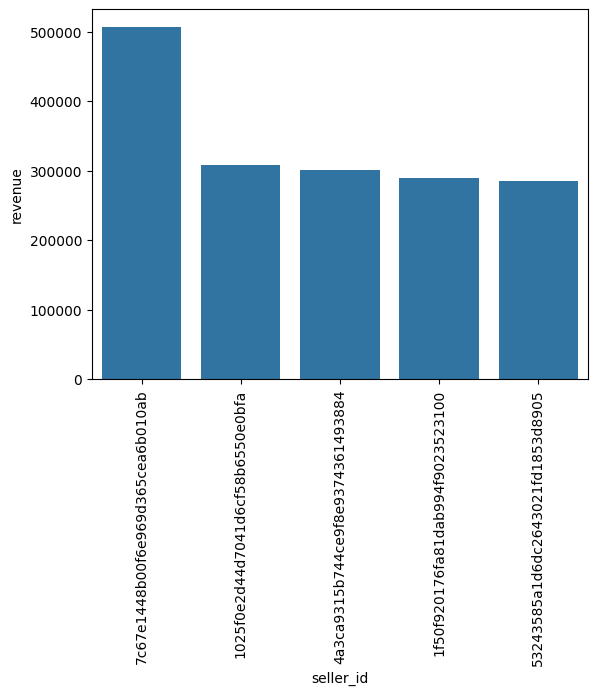

In [29]:
sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# advanced queries

* Calculate the moving average of order values for each customer over their order history.

In [34]:
query="""select customer_id,order_purchase_timestamp,payments,
avg(payments) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row ) as mov_avg
from 
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payments
from orders
join payments
on orders.order_id=payments.order_id) as a"""
cur.execute(query)
data=cur.fetchall()

In [35]:
df=pd.DataFrame(data,columns=["customer_id","timestamp","payments","mov_vag"])

In [36]:
df.head()

,customer_id,timestamp,payments,mov_vag
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


* Calculate the cumulative sales per month for each year.

In [43]:
query="""select years,months,payments,sum(payments)over( order by years, months) as cumulative from 
(select year(orders.order_purchase_timestamp) as years  ,month(orders.order_purchase_timestamp) as months,round(sum(payments.payment_value),2)as payments
from orders
join payments
on orders.order_id=payments.order_id
group by years,months order by years,months) as a"""
cur.execute(query)
data=cur.fetchall()

In [44]:
df=pd.DataFrame(data,columns=["year","month","payments","cumu_payments"])

In [45]:
df.head()

,year,month,payments,cumu_payments
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


* Calculate the year-over-year growth rate of total sales.

* formula = ((currentyear-previousyear)/previous_year)*100

In [46]:
query="""with my_tab as (select year(orders.order_purchase_timestamp) as years ,round(sum(payments.payment_value),2)as payments
from orders
join payments
on orders.order_id=payments.order_id
group by years order by years )

select years,payments,lag(payments,1)over(order by years) as pre_year, 
((payments-lag(payments,1)over(order by years))/lag(payments,1)over(order by years))*100 as growth_rate 
from my_tab """
cur.execute(query)
data=cur.fetchall()


In [49]:
df=pd.DataFrame(data,columns=["year","curr_year","prev_year","%growth"])

In [50]:
df.head()

,year,curr_year,prev_year,%growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


* Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [51]:
query="""with a as (select customers.customer_id,min(orders.order_purchase_timestamp) first_order
from customers
join orders
on customers.customer_id=orders.customer_id
group by customers.customer_id),
b as (
select a.customer_id , count( distinct orders.order_purchase_timestamp) 
from a join orders
on a.customer_id=orders.customer_id
and orders.order_purchase_timestamp>first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id)
select  100 * (count(distinct a.customer_id)/count(distinct b.customer_id)) as retention
from a left join b
on a.customer_id=b.customer_id"""
cur.execute(query)
data=cur.fetchall()

In [52]:
data

[(None,)]

* Identify the top 3 customers who spent the most money in each year.

In [54]:
query="""select years,customers,payment, top_customers from
(select year(orders.order_purchase_timestamp) as years ,orders.customer_id as customers, sum(payments.payment_value) as payment,
dense_rank()over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc  ) as top_customers
from orders
join payments
on orders.order_id=payments.order_id
group by years,customers) as a 
where top_customers<=3
"""
cur.execute(query)
data=cur.fetchall()

In [56]:
df=pd.DataFrame(data,columns=["year","customer_id","payment","rank"])

In [57]:
df.head()

,year,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2


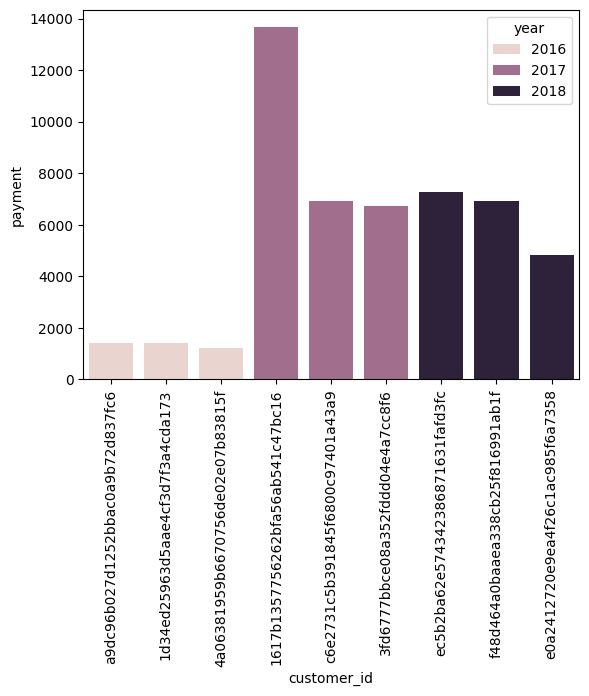

In [59]:
sns.barplot(x="customer_id",y="payment",data=df,hue="year")
plt.xticks(rotation=90)
plt.show()